# CT Images Denoising - Deep Learning Models

Description of the jupyter notebook and maybe brief overview of the all project.

**Authors:** [Raphaël Achddou](https://people.epfl.ch/raphael.achddou) ([contact](mailto:raphael.achddou@epfl.ch)), [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho) ([contact](mailto:paulo.ribeirodecarvalho@epfl.ch))

**References:**
[1] FFDNet: Toward a Fast and Flexible Solution for CNN based Image Denoising ([link](https://arxiv.org/abs/1710.04026))
[2] Plug-and-Play Image Restoration with Deep Denoiser Prior ([link](https://arxiv.org/abs/2008.13751))
[3] Beyond a Gaussian Denoiser: Residual Learning of Deep CNN for Image Denoising ([link](https://arxiv.org/abs/1608.03981))
[4] An Analysis and Implementation of the FFDNet Image Denoising Method ([link](http://www.ipol.im/pub/art/2019/231/))
[5] Github from paper author cszn ([link](https://github.com/cszn/KAIR))

## Import

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import v2
from models.cnn_viewer import CnnViewer
from models.noises import gaussian, pixel_intensity_adaptive
from utils import display_test_results

%load_ext autoreload
%autoreload 2

to_pil = transforms.functional.to_pil_image
to_float = v2.ToDtype(torch.float32, scale=False)

## Load Data

In [2]:
test_ct_image_folder = 'data/test/ct_images' 

## Models

In this work, we will be using three architecture from the simpler to the more accurate model. We start with the DNCNN [[1](https://github.com/cszn/KAIR/blob/master/main_train_dncnn.py), [2](https://github.com/cszn/DnCNN/tree/master/TrainingCodes/dncnn_pytorch)], followed by the FFDNET [[3](http://www.ipol.im/pub/art/2019/231/)] and finally with DRUNET [[4](https://github.com/cszn/DPIR)].

Let's maybe use models that have been made for the Grand Challenge.
RED-CNN [[5](https://github.com/SSinyu/RED-CNN)]
CT-FORMER [[6](https://github.com/wdayang/CTformer)]

summary of few methods and their papers [here](https://github.com/SSinyu/CT-Denoising-Review/blob/master/README.md).

### CT (0%, baseline)

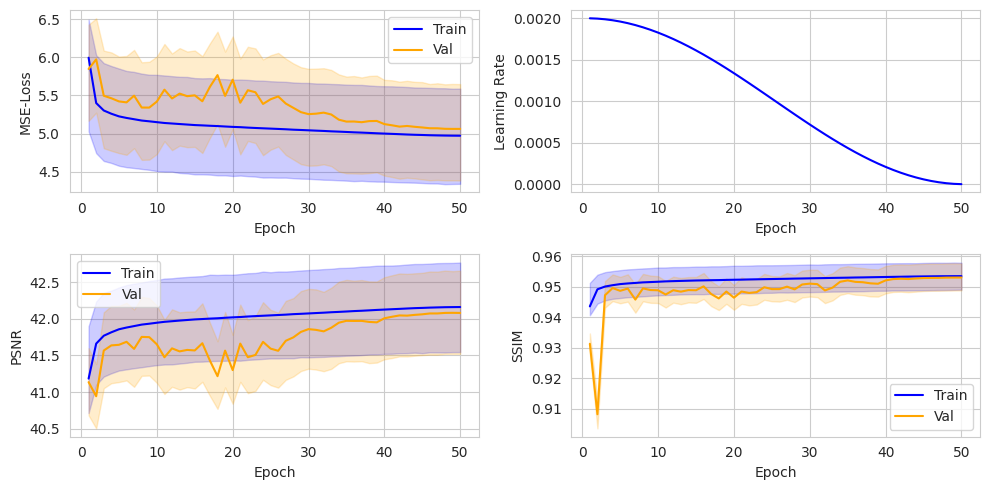

In [3]:
# model train with a smaller initial lr -> 2e-3
cnn_ct = CnnViewer(model_path='models/dncnn/2024-04-16 17h17m12s - CT/training_save_epoch_50.tar',
                   model_name='DnCNN',
                   device='cuda')

cnn_ct.print_training_stats()

In [4]:
perf_ct, data_ct, target_ct, prediction_ct = cnn_ct.test(test_ct_path=test_ct_image_folder, 
                                                      add_noise=lambda x: gaussian(x, var=20))

# Display mean performance
display_test_results(perf=perf_ct)

Progress of predictions: 222it [01:25,  2.60it/s]                         

Results (init):
 MSE:  17.49 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  4.97 (0.71)
 PSNR: 42.17 (0.68)
 SSIM: 0.95 (0.00)


### DL (100%, w/o texture)

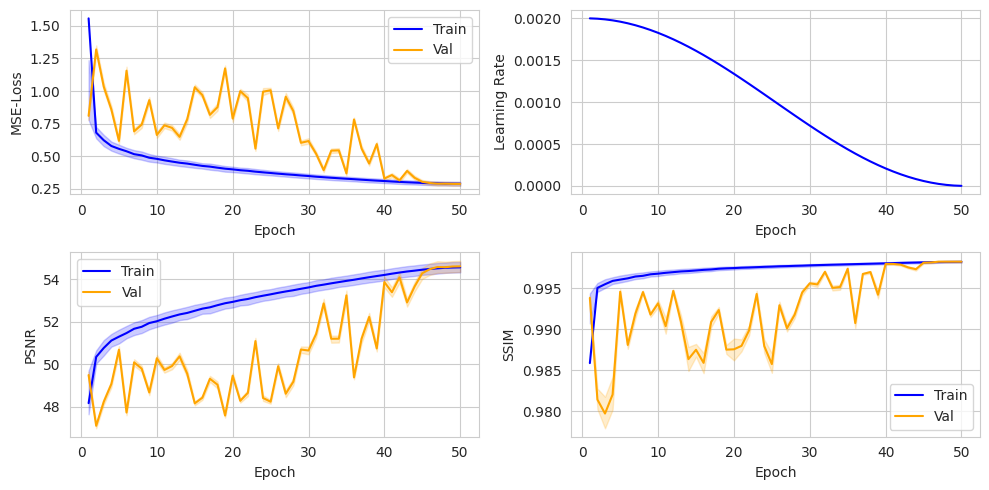

In [5]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_no_texture = CnnViewer(
    model_path='models/dncnn/2024-04-17 15h12m42s - DL/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_no_texture.print_training_stats()

In [6]:
perf_dl_no_tex, data_dl_no_tex, target_dl_no_tex, prediction_dl_no_tex = cnn_dl_no_texture.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_dl_no_tex)

Progress of predictions: 222it [01:05,  3.37it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  9.42 (1.59)
 PSNR: 39.58 (0.73)
 SSIM: 0.91 (0.01)


### DL (100%, w/ texture)

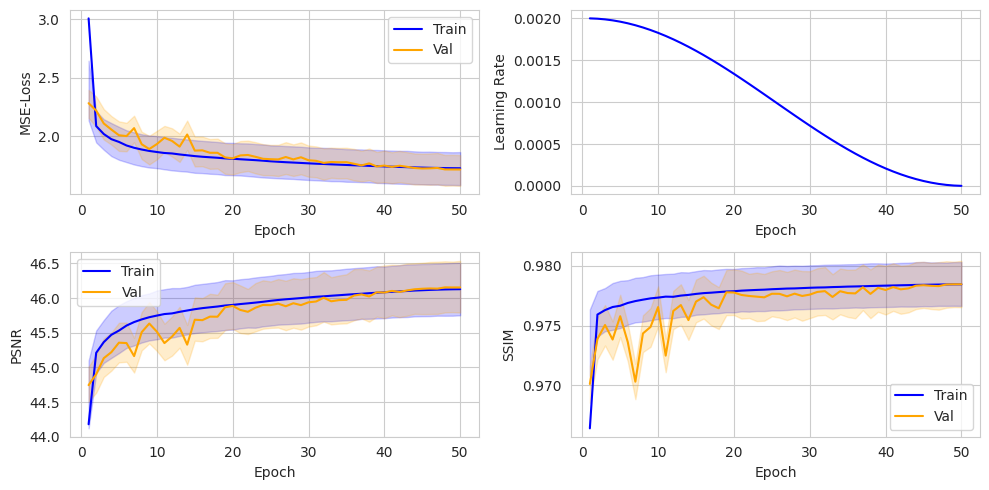

In [7]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture = CnnViewer(
    model_path='models/dncnn/2024-05-22 19h52m23s - DL TEXTURE/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture.print_training_stats()

In [8]:
perf_dl_tex, data_dl_tex, target_dl_tex, prediction_dl_tex = cnn_dl_texture.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_dl_tex)

Progress of predictions: 222it [01:06,  3.35it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  8.53 (1.51)
 PSNR: 40.08 (0.74)
 SSIM: 0.92 (0.01)


### DL (80%, w/ texture)

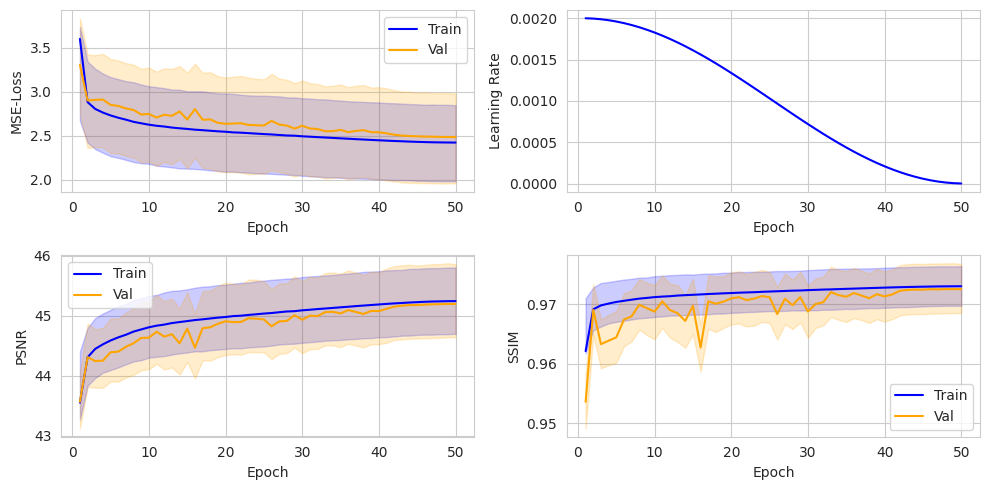

In [9]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture_80 = CnnViewer(
    model_path='models/dncnn/2024-05-27 20h56m45s - MIX 80/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture_80.print_training_stats()

In [10]:
perf_mix_80, data_mix_80, target_mix_80, prediction_mix_80 = cnn_dl_texture_80.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_mix_80)

Progress of predictions: 222it [01:05,  3.40it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  5.13 (0.72)
 PSNR: 41.98 (0.67)
 SSIM: 0.95 (0.00)


### DL (60%, w/ texture)

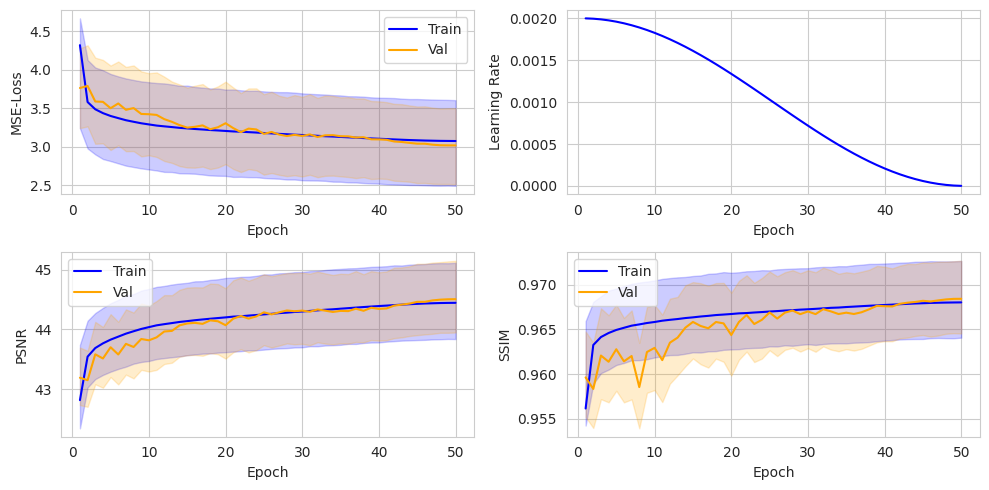

In [11]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture_60 = CnnViewer(
    model_path='models/dncnn/2024-05-27 20h53m11s - MIX 60/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture_60.print_training_stats()

In [12]:
perf_mix_60, data_mix_60, target_mix_60, prediction_mix_60 = cnn_dl_texture_60.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_mix_60)

Progress of predictions: 222it [01:03,  3.50it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  5.03 (0.71)
 PSNR: 42.09 (0.68)
 SSIM: 0.95 (0.00)


### DL (40%, w/ texture)

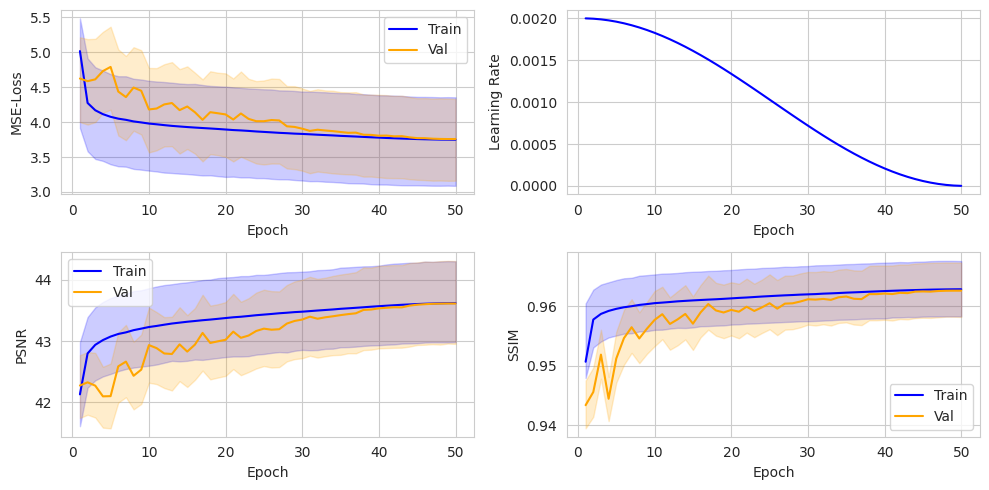

In [13]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture_40 = CnnViewer(
    model_path='models/dncnn/2024-05-27 20h52m07s - MIX 40/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture_40.print_training_stats()

In [14]:
perf_mix_40, data_mix_40, target_mix_40, prediction_mix_40 = cnn_dl_texture_40.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_mix_40)

Progress of predictions: 222it [01:04,  3.45it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  5.01 (0.71)
 PSNR: 42.12 (0.68)
 SSIM: 0.95 (0.00)


### DL (20%, w/ texture)

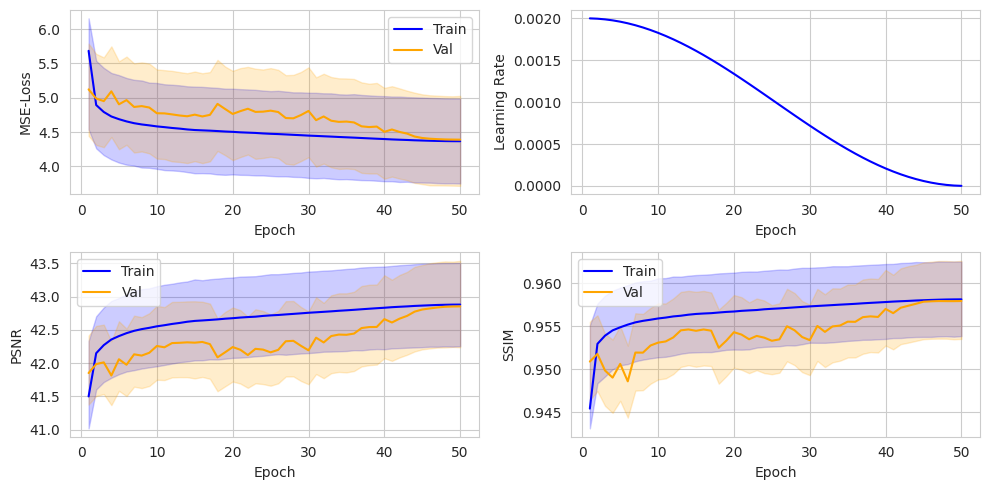

In [15]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture_20 = CnnViewer(
    model_path='models/dncnn/2024-05-27 20h46m55s - MIX 20/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture_20.print_training_stats()

In [16]:
perf_mix_20, data_mix_20, target_mix_20, prediction_mix_20 = cnn_dl_texture_20.test(
    test_ct_path=test_ct_image_folder, 
    add_noise=lambda x: gaussian(x, var=20)
)

# Display mean performance
display_test_results(perf=perf_mix_20)

Progress of predictions: 222it [01:06,  3.35it/s]                         

Results (init):
 MSE:  17.48 (0.19)
 PSNR: 35.73 (0.05)
 SSIM: 0.84 (0.01)

Results (final):
 MSE:  4.98 (0.71)
 PSNR: 42.15 (0.68)
 SSIM: 0.95 (0.00)


## Results

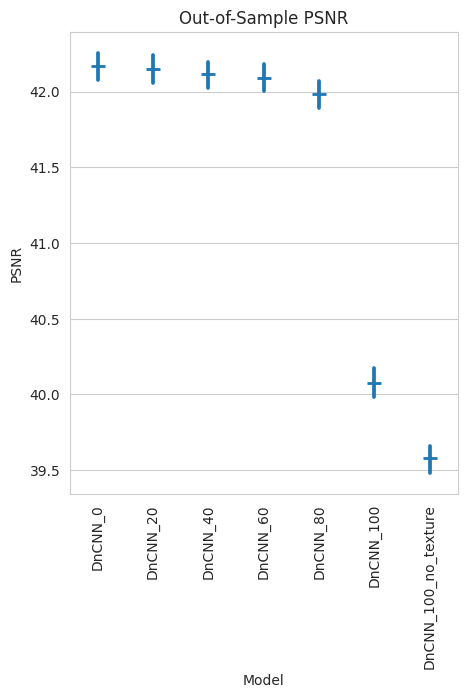

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, t

models = ['DnCNN_0',
          'DnCNN_20', 
          'DnCNN_40', 
          'DnCNN_60', 
          'DnCNN_80', 
          'DnCNN_100',
          'DnCNN_100_no_texture']

psnr = [perf_ct['psnr']['final'],
        perf_mix_20['psnr']['final'], 
        perf_mix_40['psnr']['final'], 
        perf_mix_60['psnr']['final'], 
        perf_mix_80['psnr']['final'],
        perf_dl_tex['psnr']['final'],
        perf_dl_no_tex['psnr']['final']]

# Convert data to a DataFrame
data = pd.DataFrame({
    'psnr': [item for sublist in psnr for item in sublist],
    'model': [model for model, sublist in zip(models, psnr) for item in sublist]
})

# Create the box plot with Seaborn
plt.figure(figsize=(5, 6))
sns.pointplot(x='model', 
              y='psnr', 
              data=data, 
              errorbar=('ci', 95), 
              linestyle='none',
              marker='_',
              markersize=10)

# Customize x-ticks
plt.xticks(ticks=range(len(models)), labels=models, rotation=90)

# Add title and axis labels
plt.title("Out-of-Sample PSNR")
plt.xlabel("Model")
plt.ylabel("PSNR")

# Display the plot
plt.show()

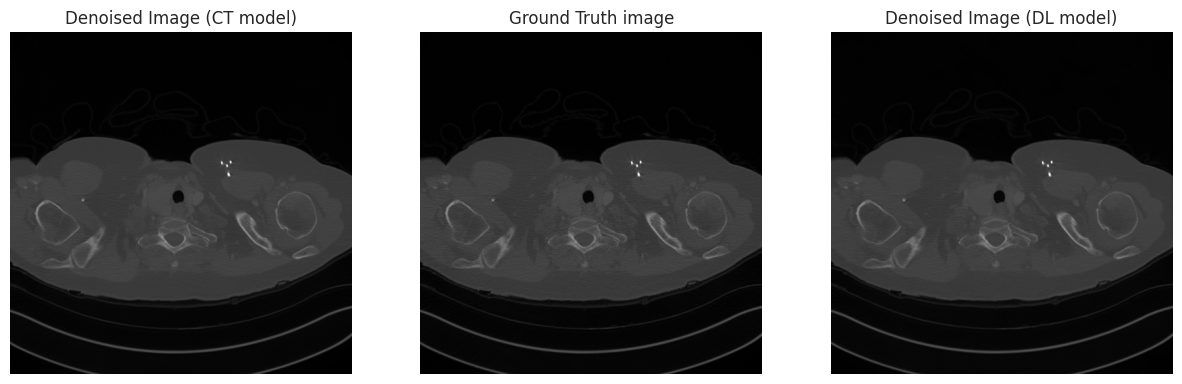

In [47]:
idx = 1000  # select one of the 3326 projections in the test set

# Display the CT images to have a quick overview
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(prediction_ct[idx], cmap='gray')
axs[0].set_title('Denoised Image (CT model)')
axs[0].axis('off')  # Turn off axis display
axs[1].imshow(target_mix_80[idx], cmap='gray')
axs[1].set_title('Ground Truth image')
axs[1].axis('off')  # Turn off axis display
axs[2].imshow(prediction_mix_80[idx], cmap='gray')
axs[2].set_title('Denoised Image (DL model)')
axs[2].axis('off')  # Turn off axis display

#plt.savefig('comparaison', dpi=1080)
plt.show()